In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max.rows', 500)

In [84]:
from pylab import *

cmap = cm.get_cmap('Pastel1', 4)    # PiYG
colors=[]
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    colors.append(matplotlib.colors.rgb2hex(rgba))

In [2]:
def same_as_upper(col:pd.Series)-> pd.Series:
    '''
    Recursively fill NaN rows with the previous value
    '''
    if any(pd.Series(col).isna()):
        col=pd.Series(np.where(col.isna(), col.shift(1), col))
        return same_as_upper(col)
    else:
        return col

In [3]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_cor_sexo_brasil.csv')

In [4]:
df = pd.pivot_table(data=df, index=['v2010'], columns=['v2007'])

In [5]:
df.columns=['Homem', 'Mulher']

In [6]:
df.reset_index()

,v2010,Homem,Mulher
0,Amarela,3815.3726,3289.5686
1,Branca,3574.0776,2746.7478
2,Ignorado,3707.5256,3441.5210
3,IndÃ­gena,2333.0181,1707.7792
4,Negro,2170.4851,1771.1996


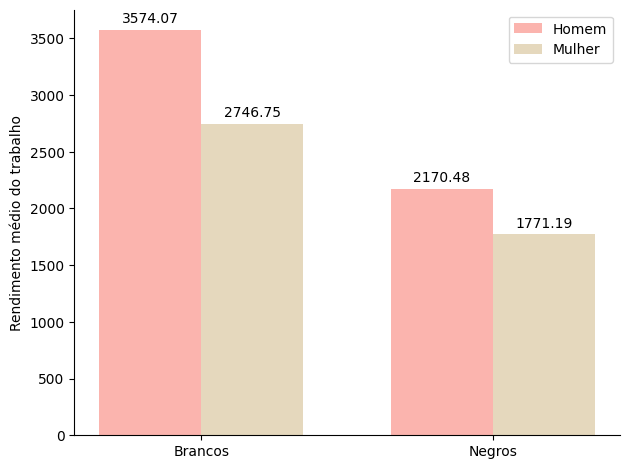

In [95]:
labels = ['Brancos', 'Negros']
men_means = [3574.07, 2170.48]
women_means = [2746.747, 1771.19]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Homem', color=colors[0])
rects2 = ax.bar(x + width/2, women_means, width, label='Mulher', color=colors[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rendimento médio do trabalho')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()
fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/wage_2002_group.pdf', bbox_inches='tight')

plt.show()

In [94]:
2746.74/3574.07

0.7685188034929366

In [9]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_cor_regions.csv')

df=df[(df['v2010']=='Branca') | (df['v2010']=='Negro')]
df.reset_index(inplace=True)
df= df[[df.regiao[k] in ['Nordeste', 'Sudeste'] for k in range(len(df))]]
df

,index,v2010,regiao,rendimento
1,6,Branca,Nordeste,2279.4827
3,8,Branca,Sudeste,3496.0430
6,19,Negro,Nordeste,1601.1753
8,21,Negro,Sudeste,2159.2996


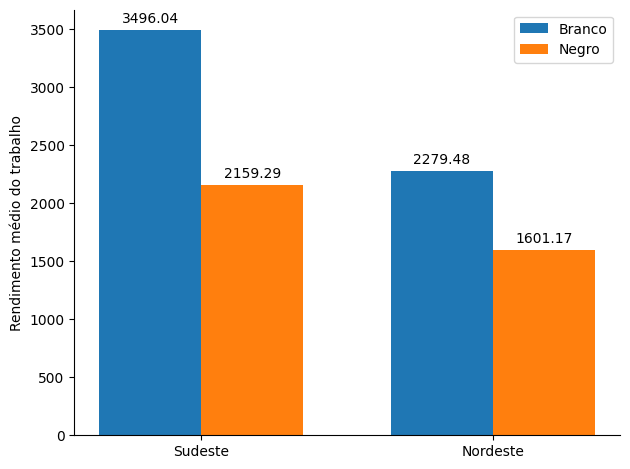

In [10]:
labels = ['Sudeste', 'Nordeste']
white_means = [3496.04,2279.48]
black_means = [2159.29, 1601.17]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, white_means, width, label='Branco', color=colors[0])
rects2 = ax.bar(x + width/2, black_means, width, label='Negro', color=colors[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rendimento médio do trabalho')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()
fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/wage_2002_region.pdf', bbox_inches='tight')

plt.show()

In [11]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_cor_sexo_regions.csv')

df= df[df['v2007']==2]
df=df[(df['v2010']=='Branca') | (df['v2010']=='Negro')]
df.reset_index(inplace=True)
df= df[[df.regiao[k] in ['Nordeste', 'Sudeste'] for k in range(len(df))]]
df

,index,v2007,v2010,regiao,rendimento
1,16,2,Branca,Nordeste,2104.5867
3,18,2,Branca,Sudeste,2971.1753
6,42,2,Negro,Nordeste,1499.7889
8,44,2,Negro,Sudeste,1855.9591


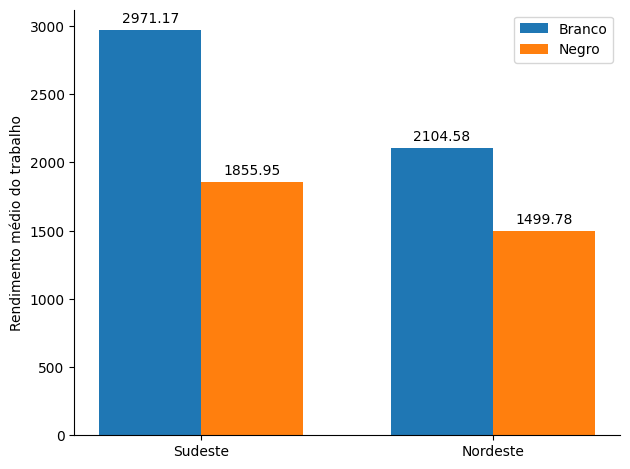

In [12]:
labels = ['Sudeste', 'Nordeste']
white_means = [2971.17,2104.58]
black_means = [1855.95, 1499.78]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, white_means, width, label='Branco',color=colors[0])
rects2 = ax.bar(x + width/2, black_means, width, label='Negro',color=colors[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rendimento médio do trabalho')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()
fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/wage_2002_region_women.pdf', bbox_inches='tight')

plt.show()

In [13]:
1499.78/2104.58

0.7126267473795247

In [14]:
1855.95/2971.17

0.624652914508426

In [43]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_setor.csv')

df=df[(df['v2010']=='Branca') | (df['v2010']=='Negro')]
df.reset_index(inplace=True)

map_ocup={
    1:'Setor Privado',
    2:'Setor Público',
    3:'Doméstico'
}

df['tipo_ocupacao']=df['tipo_ocupacao'].map(map_ocup)

In [44]:
df

,index,v2007,v2010,tipo_ocupacao,wage_mean
0,6,1,Branca,Setor Privado,3158.47070
1,7,1,Branca,Setor Público,6092.33980
2,8,1,Branca,Doméstico,1377.30480
3,9,2,Branca,Setor Privado,2593.52120
4,10,2,Branca,Setor Público,4015.48070
5,11,2,Branca,Doméstico,1121.83480
6,23,1,Negro,Setor Privado,1928.10640
7,24,1,Negro,Setor Público,3808.10910
8,25,1,Negro,Doméstico,1291.41200
9,26,2,Negro,Setor Privado,1689.61160


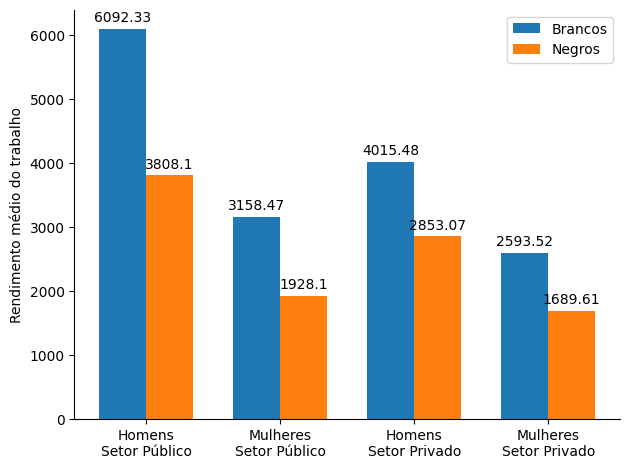

In [45]:
labels = ['Homens\nSetor Público', 'Mulheres\nSetor Público', 
          'Homens\nSetor Privado', 'Mulheres\nSetor Privado']
white_means = [6092.33, 3158.47, 4015.48, 2593.52]
black_means = [3808.10,1928.10,2853.07,1689.61]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, white_means, width, label='Brancos')
rects2 = ax.bar(x + width/2, black_means, width, label='Negros')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rendimento médio do trabalho')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()

plt.show()

In [37]:
3808.1/6092.33

0.6250646304451662

In [38]:
2853.07/4015.48

0.7105177961289809

In [60]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/participacao_setor.csv')

In [61]:
map_ocup={
    1:'Setor Privado',
    2:'Setor Público',
    3:'Doméstico'
}

df['tipo_ocupacao']=df['tipo_ocupacao'].map(map_ocup)

In [62]:
df['prop']=df['table1'] / df.groupby(['v2007','v2010'])['table1'].transform('sum')

In [96]:
groups =[('Branca',1),('Branca',2),('Negro',1),('Negro',2),]

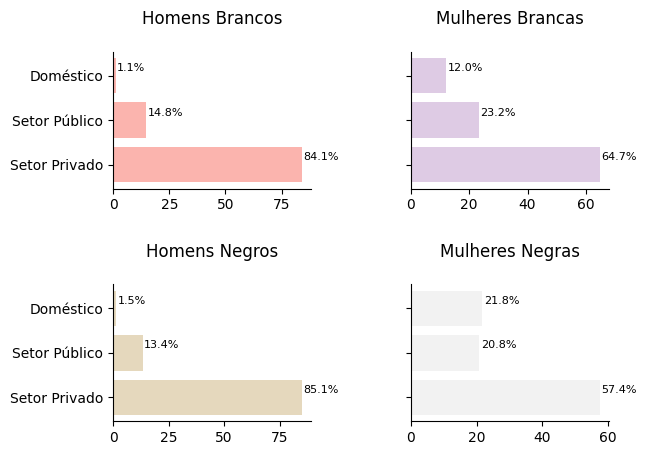

In [121]:
fig, axs = plt.subplots(2,2)
axs = axs.flatten()
for i, group in enumerate(groups):
    race, gender = group
    tab = df[(df['v2010']==race) & (df['v2007']==gender)]
    dict_ocup = dict(zip(tab['tipo_ocupacao'], tab['prop']))

    y=[k for k,v in dict_ocup.items()]
    x=[v*100 for k,v in dict_ocup.items()]

    titles=["Homens Brancos", "Mulheres Brancas", "Homens Negros", "Mulheres Negras"]
    axs[i].barh(y, x, color=colors[i])
    
    if i in [1,3]:
        axs[i].set_yticklabels('')

    # setting label of y-axis
    axs[i].spines.right.set_visible(False)
    axs[i].spines.top.set_visible(False)
    # setting label of x-axis
    # plt.xlabel("")
    axs[i].set_title(titles[i], pad=20)
    
    # plt.ylabel("")
    
for i, ax in enumerate(axs):
    for p in ax.patches:
        ax.annotate(str(round(p.get_width(), 1))+'%', (p.get_width() + 0.5, p.get_y() + 0.5), fontsize=8)
    
fig.subplots_adjust(wspace=0.5, hspace=0.7)

fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/participation.pdf', bbox_inches='tight')

plt.show()